In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
df= pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
df.shape

(1338, 7)

Data set has 1338 rows and 7 columns out of which 6 columns are independent variable and 1 columns i.e. charges is dependent variable.

In [6]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
df.columns.tolist()

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [8]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Types of each column. There are 3 types of data in data frame.

In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There is no null value present in data set.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Gives the brief info of the dataset.

In [11]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Categorical data:
    sex,
    smoker and
    region

This gives the statistical information of the numerical data present in the dataset.
We can observe:
1) There is no null value present in the dataset as the count of all the columns is equal to rows present in the data.
2) The mean value in all the columns is greater than the median which means that data is skewed to the right in these columns.
3) We can see that there is difference between 75% and max hence there are outliers present inside the data.
4) We can also clearly see the standard deviation, min, and 25% percentile values from the describe method.

In [12]:
#separating numerical and categorical columns
numerical_col=[]
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
    else:
        numerical_col.append(i)

In [13]:
print('categorical column:',categorical_col)
print('numerical column:',numerical_col)

categorical column: ['sex', 'smoker', 'region']
numerical column: ['age', 'bmi', 'children', 'charges']


In [14]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [15]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [16]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

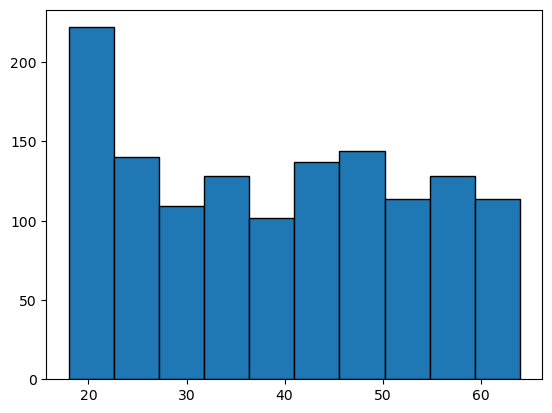

In [17]:
plt.hist(df['age'],edgecolor='black')
plt.show()

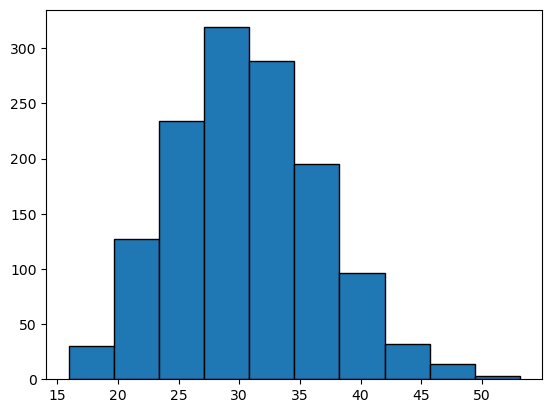

In [18]:
plt.hist(df['bmi'],edgecolor='black')
plt.show()

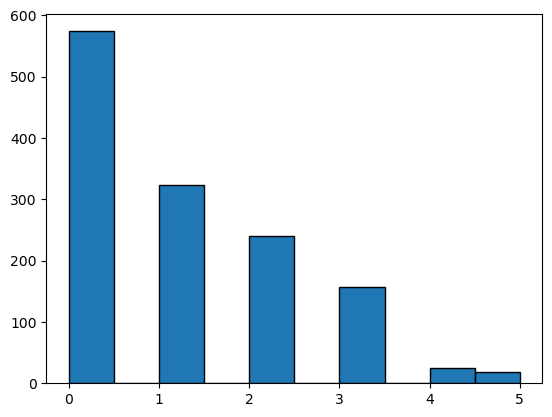

In [19]:
plt.hist(df['children'],edgecolor='black')
plt.show()

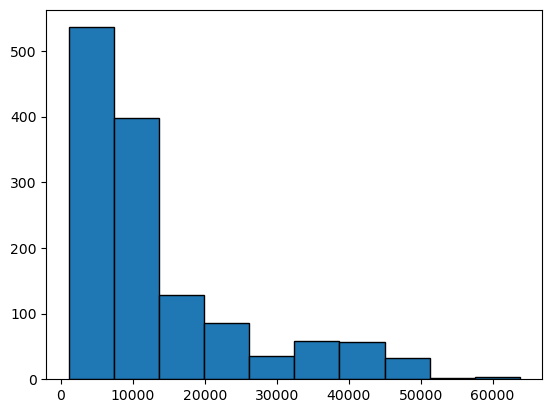

In [20]:
plt.hist(df['charges'],edgecolor='black')
plt.show()

In [21]:
#encoding categorical columns
df.replace({'sex':{'male':0,'female':1}},inplace=True)
df.replace({'smoker':{'yes':0,'no':1}},inplace=True)
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

<Axes: >

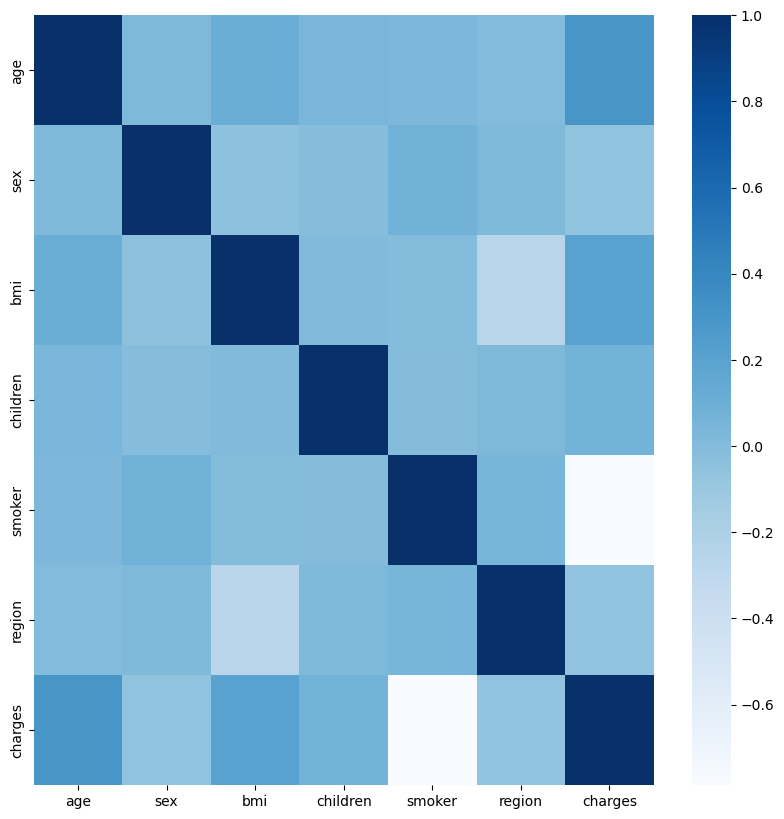

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap="Blues")

This heat map shows the correlation between different columns.
Some columns are positively correlated with each other and some are negatively correlated with each other.


In [23]:
df.sample(10)

,age,sex,bmi,children,smoker,region,charges
405,52,1,38.380,2,1,2,11396.90020
917,45,0,22.895,0,0,2,35069.37452
579,25,1,23.465,0,1,2,3206.49135
278,59,0,31.790,2,1,0,12928.79110
38,35,0,36.670,1,0,2,39774.27630
1236,63,1,21.660,0,1,2,14449.85440
122,20,1,28.975,0,1,3,2257.47525
453,20,0,29.735,0,1,3,1769.53165
516,20,0,35.310,1,1,0,27724.28875
1056,48,1,28.900,0,1,1,8277.52300


In [24]:
X= df.drop(columns='charges',axis=1) 
Y= df['charges']

In [25]:
print(X)
print(Y)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [26]:
#splitting the data into training and testing data
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.2,random_state=2)
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [27]:
#creating model 
model= LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [28]:
#prediction on training data
prediction= model.predict(X_train)
r2_train= metrics.r2_score(Y_train,prediction)
print('R squared value:',r2_train)

R squared value: 0.751505643411174


In [29]:
#prediction on testing data
prediction1= model.predict(X_test)
r2_test= metrics.r2_score(Y_test,prediction1)
print('R squared value:',r2_test)

R squared value: 0.7447273869684077


In this case we have almost equal value of r2 for training and testing data. So we dont have over fitting issue in this case.

In [36]:
#prediction
input_data= (27,0,42.13,0,0,0)
data= np.asarray(input_data)
reshape= data.reshape(1,-1)

In [37]:
output= model.predict(reshape)

In [38]:
print(output)

[32075.73866962]
